<a href="https://colab.research.google.com/github/sabahomarkm/Improved-Cyber-Attack-Detection-using-Machine-Learning/blob/main/logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#importing needed libraries

In [50]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [51]:
pd.set_option('display.max_columns', None)
df=pd.read_excel('/content/drive/MyDrive/Improved Cyber Attack Detection using Machine Learning/Dataset/NetworkData.xlsx')
df.head()

,NetID,SRC_IP,DST_IP,avg_payload,Reputation,PROTOCOL,data_BW,recv_data1,recv_data2,recv_data3,rec_data,recv_data_size1,recv_data_size2,recv_data_size3,total_recv_datasize,sent_data1,sent_data2,sent_data3,sent_data,sent_data_size1,sent_data_size2,sent_data_size3,sent_recv_datasize,recvsent_Count,avgpyload_size,traff_cat,Label
0,XXXXXX,69.121.170.4,192.168.2.2,49,AVERAGE,UDP,25,277,265,345,887,1459126.64,1230543.08,2068641.91,4758311.63,10,24,31,65,1516981.10,1764079.61,2378592.62,5659653.33,952,7116.64,2231,0
1,XXXXXX,66.154.80.105,217.157.139.53,46,GOOD,TCP,14,37,15,45,97,35372.55,20134.00,83856.67,139363.22,2,4,4,10,10000.00,19500.00,57500.00,87000.00,107,1500000.00,2223,0
2,XXXXXX,66.154.87.41,70.226.208.38,53,GOOD,TCP,14,31,14,8,53,28248.85,4777.66,4348.95,37375.46,14,8,5,27,709625.00,240311.84,70946.86,1020883.70,80,5000000.00,2222,0
3,XXXXXX,75.34.134.33,66.154.80.111,15,GOOD,TCP,14,0,1,0,1,0.00,4000.00,0.00,4000.00,5,4,3,12,30103.05,28089.99,18753.92,76946.96,13,500.00,2223,0
4,XXXXXX,192.168.1.2,83.86.204.79,48,GOOD,TCP,5,15,33,12,60,69083.38,223007.51,46379.40,338470.29,8,7,6,21,195600.00,176000.00,70500.00,442100.00,81,9000000.00,2223,0


In [52]:
# checking number of rows and columns
df.shape

(1249, 27)

In [53]:
df.describe()

,avg_payload,data_BW,recv_data1,recv_data2,recv_data3,rec_data,recv_data_size1,recv_data_size2,recv_data_size3,total_recv_datasize,sent_data1,sent_data2,sent_data3,sent_data,sent_data_size1,sent_data_size2,sent_data_size3,sent_recv_datasize,recvsent_Count,avgpyload_size,traff_cat,Label
count,1249.000000,1249.000000,1249.000000,1249.000000,1249.000000,1249.000000,1.249000e+03,1.249000e+03,1.249000e+03,1.249000e+03,1249.000000,1249.000000,1249.000000,1249.000000,1.249000e+03,1.249000e+03,1.249000e+03,1.249000e+03,1249.000000,1.238000e+03,1249.000000,1249.000000
mean,46.746998,14.116894,54.262610,55.680544,56.966373,166.909528,3.147439e+05,3.090418e+05,3.061457e+05,9.299314e+05,7.613291,8.270616,8.675741,24.559648,3.089540e+05,3.173819e+05,3.020052e+05,9.283411e+05,191.469175,2.764869e+06,2222.296237,0.181745
std,12.315109,2.279882,80.732325,81.020146,84.649516,235.386076,1.513433e+06,1.293928e+06,9.385775e+05,3.142967e+06,13.543207,13.644776,14.087572,38.467079,1.631418e+06,1.048443e+06,1.273680e+06,3.685585e+06,263.353988,5.406761e+06,3.314255,0.385789
min,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000,0.000000e+00,2211.000000,0.000000
25%,39.000000,14.000000,7.000000,6.000000,6.000000,26.000000,1.155000e+04,1.122578e+04,7.085000e+03,5.642350e+04,0.000000,0.000000,0.000000,2.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.511744e+04,33.000000,7.568750e+03,2222.000000,0.000000
50%,46.000000,14.000000,22.000000,24.000000,24.000000,74.000000,5.395632e+04,6.158130e+04,5.907391e+04,2.031400e+05,6.000000,6.000000,6.000000,18.000000,4.522084e+04,4.679082e+04,4.952000e+04,1.525319e+05,90.000000,1.500000e+06,2223.000000,0.000000
75%,55.000000,14.000000,65.000000,65.000000,68.000000,196.000000,1.892775e+05,2.096500e+05,2.250619e+05,6.613808e+05,8.000000,9.000000,10.000000,28.000000,1.720000e+05,1.872971e+05,1.950319e+05,5.853255e+05,227.000000,3.000000e+06,2223.000000,0.000000
max,119.000000,28.000000,715.000000,547.000000,757.000000,1859.000000,3.573349e+07,3.723382e+07,1.866511e+07,6.997262e+07,189.000000,142.000000,169.000000,429.000000,4.920688e+07,1.753799e+07,3.764708e+07,1.043919e+08,2174.000000,8.000000e+07,2236.000000,1.000000


In [54]:
df.dtypes

NetID                   object
SRC_IP                  object
DST_IP                  object
avg_payload              int64
Reputation              object
PROTOCOL                object
data_BW                  int64
recv_data1               int64
recv_data2               int64
recv_data3               int64
rec_data                 int64
recv_data_size1        float64
recv_data_size2        float64
recv_data_size3        float64
total_recv_datasize    float64
sent_data1               int64
sent_data2               int64
sent_data3               int64
sent_data                int64
sent_data_size1        float64
sent_data_size2        float64
sent_data_size3        float64
sent_recv_datasize     float64
recvsent_Count           int64
avgpyload_size         float64
traff_cat                int64
Label                    int64
dtype: object

In [55]:
#number of null values against each feature
df.isnull().sum()

NetID                   0
SRC_IP                  0
DST_IP                  0
avg_payload             0
Reputation              0
PROTOCOL                0
data_BW                 0
recv_data1              0
recv_data2              0
recv_data3              0
rec_data                0
recv_data_size1         0
recv_data_size2         0
recv_data_size3         0
total_recv_datasize     0
sent_data1              0
sent_data2              0
sent_data3              0
sent_data               0
sent_data_size1         0
sent_data_size2         0
sent_data_size3         0
sent_recv_datasize      0
recvsent_Count          0
avgpyload_size         11
traff_cat               0
Label                   0
dtype: int64

In [56]:
df['NetID'].value_counts()

XXXXXX    1249
Name: NetID, dtype: int64

In [57]:
#since NetID is dummy value and doesn't make any sense to dataset, better drop this column
df=df.drop("NetID",axis=1)
df.head(3)

,SRC_IP,DST_IP,avg_payload,Reputation,PROTOCOL,data_BW,recv_data1,recv_data2,recv_data3,rec_data,recv_data_size1,recv_data_size2,recv_data_size3,total_recv_datasize,sent_data1,sent_data2,sent_data3,sent_data,sent_data_size1,sent_data_size2,sent_data_size3,sent_recv_datasize,recvsent_Count,avgpyload_size,traff_cat,Label
0,69.121.170.4,192.168.2.2,49,AVERAGE,UDP,25,277,265,345,887,1459126.64,1230543.08,2068641.91,4758311.63,10,24,31,65,1516981.1,1764079.61,2378592.62,5659653.33,952,7116.64,2231,0
1,66.154.80.105,217.157.139.53,46,GOOD,TCP,14,37,15,45,97,35372.55,20134.00,83856.67,139363.22,2,4,4,10,10000.0,19500.00,57500.00,87000.00,107,1500000.00,2223,0
2,66.154.87.41,70.226.208.38,53,GOOD,TCP,14,31,14,8,53,28248.85,4777.66,4348.95,37375.46,14,8,5,27,709625.0,240311.84,70946.86,1020883.70,80,5000000.00,2222,0


In [58]:
df['SRC_IP'].value_counts()

192.168.1.2        210
192.168.2.2         50
66.154.87.41        47
66.154.83.107       37
66.154.87.39        37
                  ... 
87.207.243.88        1
64.179.133.119       1
79.182.150.118       1
207.152.181.170      1
64.126.122.162       1
Name: SRC_IP, Length: 647, dtype: int64

In [59]:
df['DST_IP'].value_counts()

192.168.1.2       207
66.154.80.111      47
192.168.2.2        45
66.154.87.39       33
66.154.83.107      32
                 ... 
66.154.83.100       1
81.192.195.209      1
148.240.172.5       1
90.13.213.42        1
81.5.118.239        1
Name: DST_IP, Length: 652, dtype: int64

In [60]:
#dropping SRC_IP & DST_IP because of high categorical cardinality and also not important to the dataset
df=df.drop(['SRC_IP','DST_IP'],axis=1)

In [61]:
df.head(2)

,avg_payload,Reputation,PROTOCOL,data_BW,recv_data1,recv_data2,recv_data3,rec_data,recv_data_size1,recv_data_size2,recv_data_size3,total_recv_datasize,sent_data1,sent_data2,sent_data3,sent_data,sent_data_size1,sent_data_size2,sent_data_size3,sent_recv_datasize,recvsent_Count,avgpyload_size,traff_cat,Label
0,49,AVERAGE,UDP,25,277,265,345,887,1459126.64,1230543.08,2068641.91,4758311.63,10,24,31,65,1516981.1,1764079.61,2378592.62,5659653.33,952,7116.64,2231,0
1,46,GOOD,TCP,14,37,15,45,97,35372.55,20134.00,83856.67,139363.22,2,4,4,10,10000.0,19500.00,57500.00,87000.00,107,1500000.00,2223,0


In [62]:
df['Reputation'].value_counts()

AVERAGE    741
GOOD       506
2            2
Name: Reputation, dtype: int64

In [63]:
# imputing value 2 with AVERAGE 
df['Reputation']=df['Reputation'].replace(2,"AVERAGE")

In [64]:
# CHECKING VALUE COUNTS OF REPUTATION COLUMN
df['Reputation'].value_counts()

AVERAGE    743
GOOD       506
Name: Reputation, dtype: int64

In [65]:
#Checking value counts of PROTOCOL column
df['PROTOCOL'].value_counts()

TCP     879
UDP     328
ICMP     30
ARP      10
0         2
Name: PROTOCOL, dtype: int64

In [66]:
# imputing value 0 with TCP
df['PROTOCOL']=df['PROTOCOL'].replace(0,"TCP")
df['PROTOCOL'].value_counts()

TCP     881
UDP     328
ICMP     30
ARP      10
Name: PROTOCOL, dtype: int64

In [67]:
#checking value counts of traff_cat column
df['traff_cat'].value_counts()

2223    746
2222    383
2212     53
2211     25
2232     13
2235     10
2230      6
2236      3
2231      3
2224      3
2234      2
2233      2
Name: traff_cat, dtype: int64

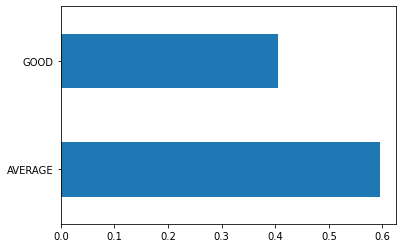

In [68]:
# around 60% value is AVERAGE and 40% value is Good- in Reputation column in the dataset
df['Reputation'].value_counts(normalize=True).plot(kind='barh');

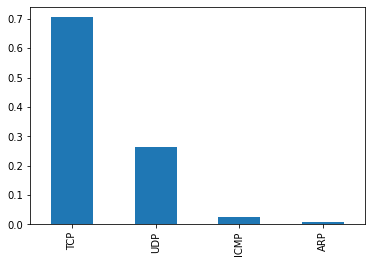

In [69]:
# around 70% - TCP , 28% - UDP, VERY LOW - ICMP AND ARP IN PROTOCOLS COLUMN
df['PROTOCOL'].value_counts(normalize=True).plot(kind='bar');

In [70]:
df.head()

,avg_payload,Reputation,PROTOCOL,data_BW,recv_data1,recv_data2,recv_data3,rec_data,recv_data_size1,recv_data_size2,recv_data_size3,total_recv_datasize,sent_data1,sent_data2,sent_data3,sent_data,sent_data_size1,sent_data_size2,sent_data_size3,sent_recv_datasize,recvsent_Count,avgpyload_size,traff_cat,Label
0,49,AVERAGE,UDP,25,277,265,345,887,1459126.64,1230543.08,2068641.91,4758311.63,10,24,31,65,1516981.10,1764079.61,2378592.62,5659653.33,952,7116.64,2231,0
1,46,GOOD,TCP,14,37,15,45,97,35372.55,20134.00,83856.67,139363.22,2,4,4,10,10000.00,19500.00,57500.00,87000.00,107,1500000.00,2223,0
2,53,GOOD,TCP,14,31,14,8,53,28248.85,4777.66,4348.95,37375.46,14,8,5,27,709625.00,240311.84,70946.86,1020883.70,80,5000000.00,2222,0
3,15,GOOD,TCP,14,0,1,0,1,0.00,4000.00,0.00,4000.00,5,4,3,12,30103.05,28089.99,18753.92,76946.96,13,500.00,2223,0
4,48,GOOD,TCP,5,15,33,12,60,69083.38,223007.51,46379.40,338470.29,8,7,6,21,195600.00,176000.00,70500.00,442100.00,81,9000000.00,2223,0


In [71]:
medavgpayld=df['avgpyload_size'].median()
df['avgpyload_size']=df['avgpyload_size'].fillna(medavgpayld)
df.isnull().sum()

avg_payload            0
Reputation             0
PROTOCOL               0
data_BW                0
recv_data1             0
recv_data2             0
recv_data3             0
rec_data               0
recv_data_size1        0
recv_data_size2        0
recv_data_size3        0
total_recv_datasize    0
sent_data1             0
sent_data2             0
sent_data3             0
sent_data              0
sent_data_size1        0
sent_data_size2        0
sent_data_size3        0
sent_recv_datasize     0
recvsent_Count         0
avgpyload_size         0
traff_cat              0
Label                  0
dtype: int64

In [72]:
df2=pd.get_dummies(df,drop_first=True)
df2.head()

,avg_payload,data_BW,recv_data1,recv_data2,recv_data3,rec_data,recv_data_size1,recv_data_size2,recv_data_size3,total_recv_datasize,sent_data1,sent_data2,sent_data3,sent_data,sent_data_size1,sent_data_size2,sent_data_size3,sent_recv_datasize,recvsent_Count,avgpyload_size,traff_cat,Label,Reputation_GOOD,PROTOCOL_ICMP,PROTOCOL_TCP,PROTOCOL_UDP
0,49,25,277,265,345,887,1459126.64,1230543.08,2068641.91,4758311.63,10,24,31,65,1516981.10,1764079.61,2378592.62,5659653.33,952,7116.64,2231,0,0,0,0,1
1,46,14,37,15,45,97,35372.55,20134.00,83856.67,139363.22,2,4,4,10,10000.00,19500.00,57500.00,87000.00,107,1500000.00,2223,0,1,0,1,0
2,53,14,31,14,8,53,28248.85,4777.66,4348.95,37375.46,14,8,5,27,709625.00,240311.84,70946.86,1020883.70,80,5000000.00,2222,0,1,0,1,0
3,15,14,0,1,0,1,0.00,4000.00,0.00,4000.00,5,4,3,12,30103.05,28089.99,18753.92,76946.96,13,500.00,2223,0,1,0,1,0
4,48,5,15,33,12,60,69083.38,223007.51,46379.40,338470.29,8,7,6,21,195600.00,176000.00,70500.00,442100.00,81,9000000.00,2223,0,1,0,1,0


In [73]:
dftraffcat=pd.get_dummies(df['traff_cat'],drop_first=True)
dftraffcat.head()

,2212,2222,2223,2224,2230,2231,2232,2233,2234,2235,2236
0,0,0,0,0,0,1,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [74]:
df_final=pd.concat([df2,dftraffcat],axis=1)
df_final.head()

,avg_payload,data_BW,recv_data1,recv_data2,recv_data3,rec_data,recv_data_size1,recv_data_size2,recv_data_size3,total_recv_datasize,sent_data1,sent_data2,sent_data3,sent_data,sent_data_size1,sent_data_size2,sent_data_size3,sent_recv_datasize,recvsent_Count,avgpyload_size,traff_cat,Label,Reputation_GOOD,PROTOCOL_ICMP,PROTOCOL_TCP,PROTOCOL_UDP,2212,2222,2223,2224,2230,2231,2232,2233,2234,2235,2236
0,49,25,277,265,345,887,1459126.64,1230543.08,2068641.91,4758311.63,10,24,31,65,1516981.10,1764079.61,2378592.62,5659653.33,952,7116.64,2231,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
1,46,14,37,15,45,97,35372.55,20134.00,83856.67,139363.22,2,4,4,10,10000.00,19500.00,57500.00,87000.00,107,1500000.00,2223,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0
2,53,14,31,14,8,53,28248.85,4777.66,4348.95,37375.46,14,8,5,27,709625.00,240311.84,70946.86,1020883.70,80,5000000.00,2222,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0
3,15,14,0,1,0,1,0.00,4000.00,0.00,4000.00,5,4,3,12,30103.05,28089.99,18753.92,76946.96,13,500.00,2223,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0
4,48,5,15,33,12,60,69083.38,223007.51,46379.40,338470.29,8,7,6,21,195600.00,176000.00,70500.00,442100.00,81,9000000.00,2223,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0


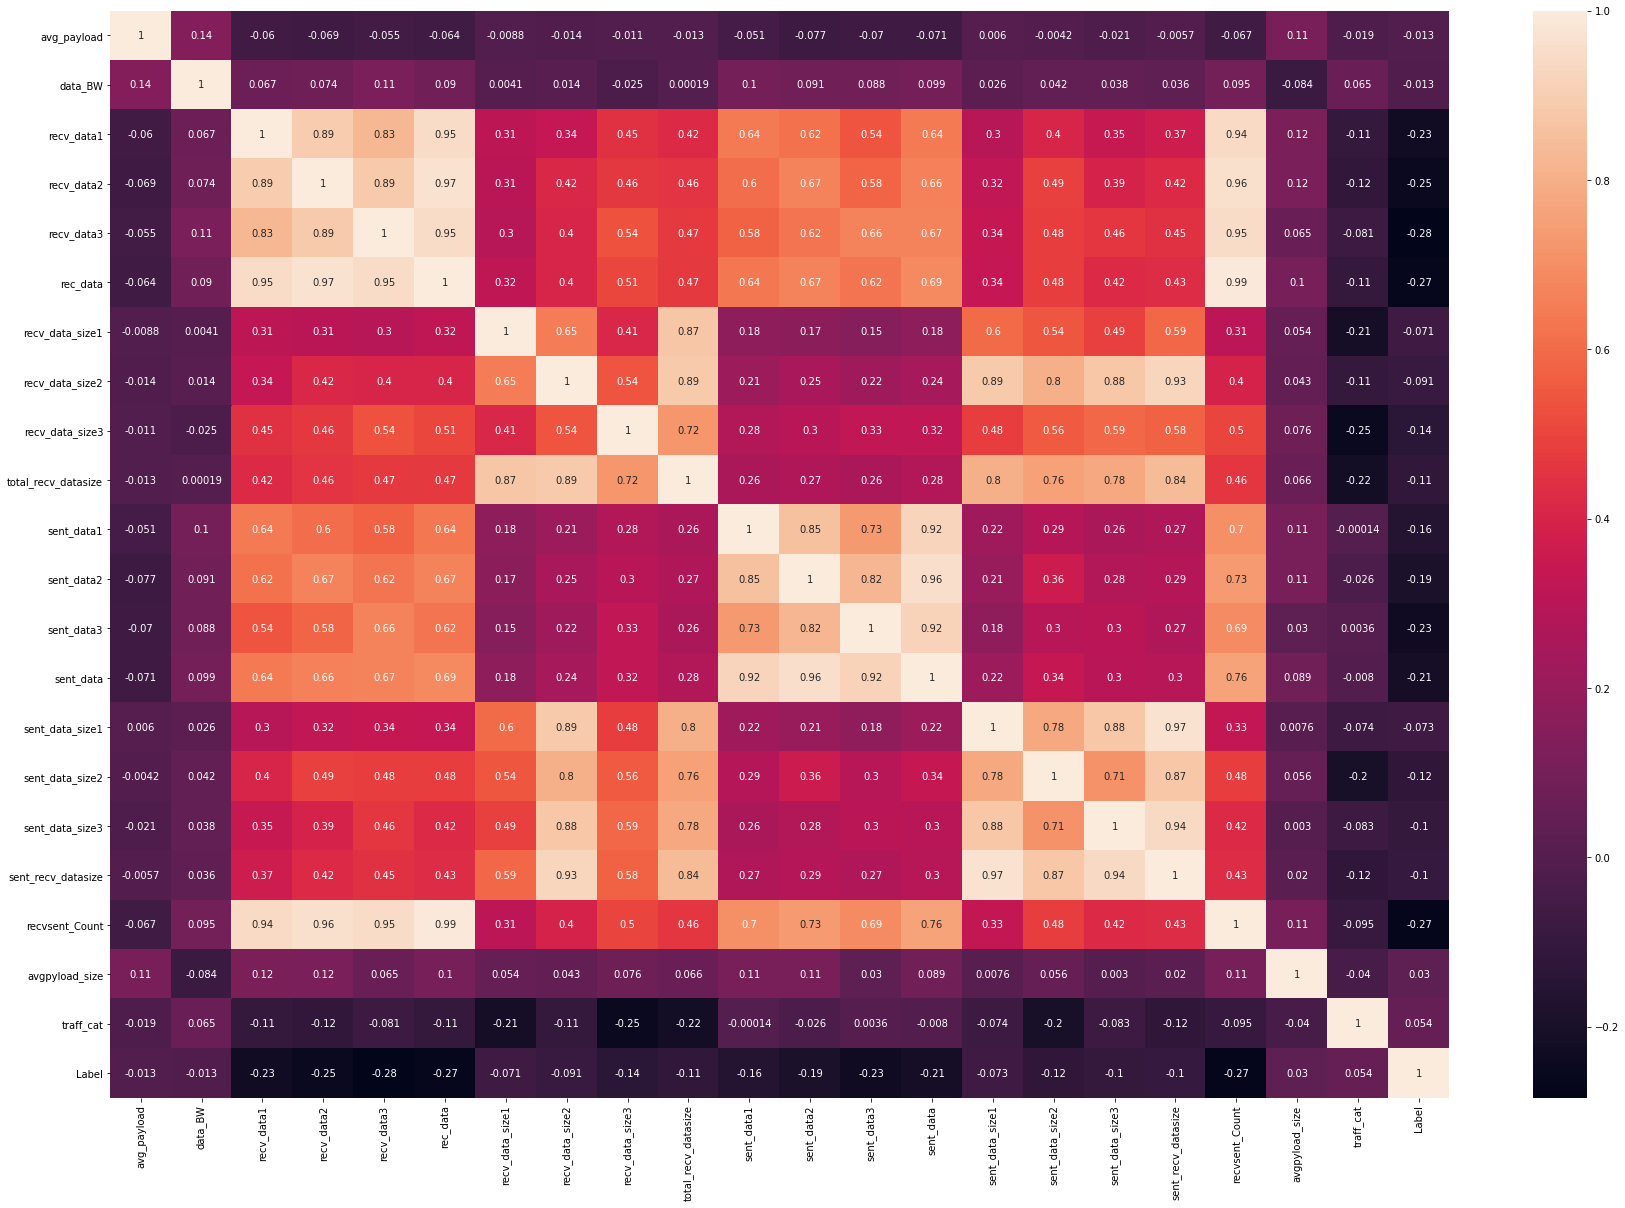

In [75]:
#ploting heat map
plt.figure(figsize=(30,20))
sns.heatmap(df.corr(),annot=True)

In [76]:
# finding highly correlated columns 
cor_matrix = df_final.corr().abs()
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))
possiblecolumnsto_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.85)]
possiblecolumnsto_drop

['recv_data2',
 'recv_data3',
 'rec_data',
 'total_recv_datasize',
 'sent_data2',
 'sent_data',
 'sent_data_size1',
 'sent_data_size3',
 'sent_recv_datasize',
 'recvsent_Count',
 'PROTOCOL_UDP']

In [77]:
clmstodrop=['rec_data','total_recv_datasize','sent_data','sent_recv_datasize','recvsent_Count']
df_final=df_final.drop(clmstodrop,axis=1)
df_final.head()

,avg_payload,data_BW,recv_data1,recv_data2,recv_data3,recv_data_size1,recv_data_size2,recv_data_size3,sent_data1,sent_data2,sent_data3,sent_data_size1,sent_data_size2,sent_data_size3,avgpyload_size,traff_cat,Label,Reputation_GOOD,PROTOCOL_ICMP,PROTOCOL_TCP,PROTOCOL_UDP,2212,2222,2223,2224,2230,2231,2232,2233,2234,2235,2236
0,49,25,277,265,345,1459126.64,1230543.08,2068641.91,10,24,31,1516981.10,1764079.61,2378592.62,7116.64,2231,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
1,46,14,37,15,45,35372.55,20134.00,83856.67,2,4,4,10000.00,19500.00,57500.00,1500000.00,2223,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0
2,53,14,31,14,8,28248.85,4777.66,4348.95,14,8,5,709625.00,240311.84,70946.86,5000000.00,2222,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0
3,15,14,0,1,0,0.00,4000.00,0.00,5,4,3,30103.05,28089.99,18753.92,500.00,2223,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0
4,48,5,15,33,12,69083.38,223007.51,46379.40,8,7,6,195600.00,176000.00,70500.00,9000000.00,2223,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0


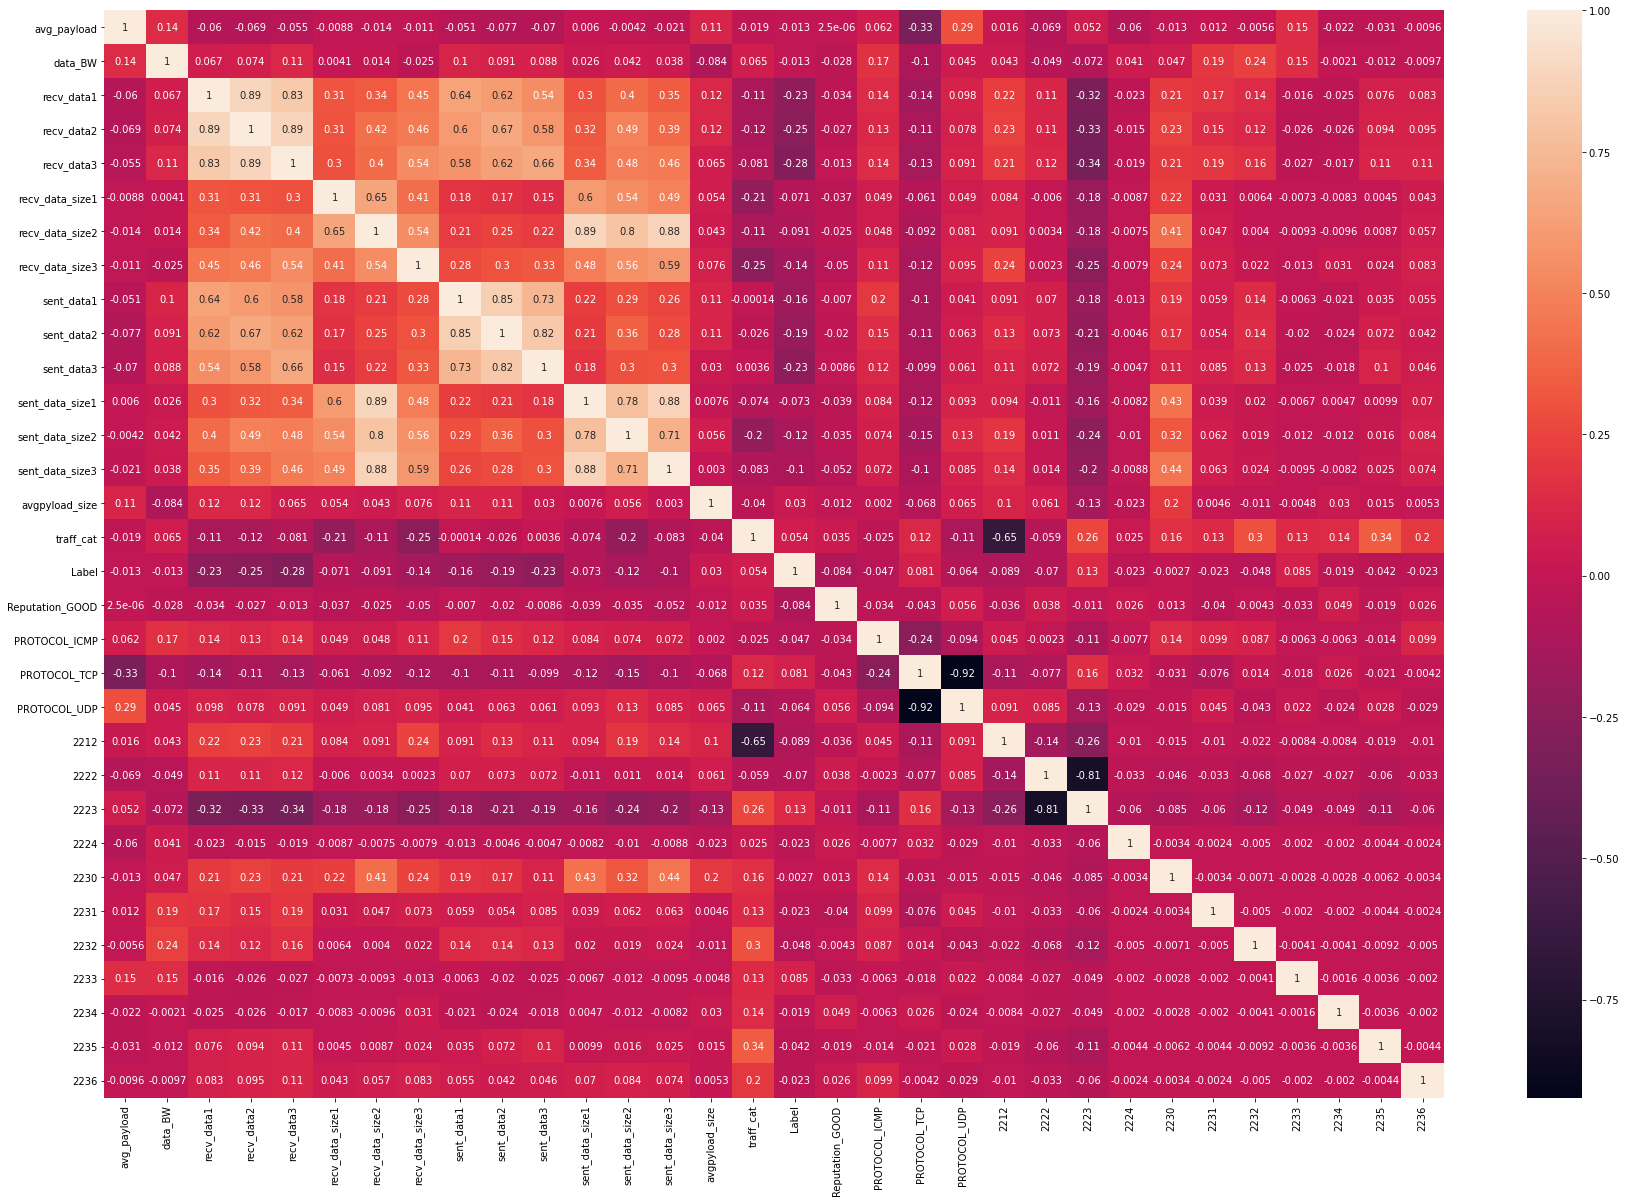

In [78]:
plt.figure(figsize=(30,20))
sns.heatmap(df_final.corr(),annot=True)

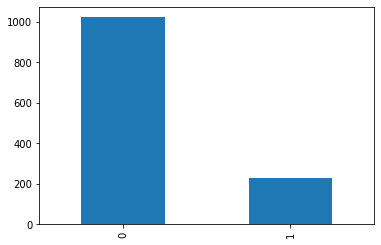

In [79]:
#Class imbalance check
df_final.Label.value_counts().plot(kind='bar')
# there is Target column - Label imbalance,however let us try modelling

In [80]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.linear_model import LogisticRegression

In [81]:
# Splitting Dataset to Train and Test data
X=df_final.drop("Label",axis=1)
Y=df_final['Label']
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=42)

In [82]:
# Modeling using Logistic Regression
lr=LogisticRegression(max_iter=100000)
lr.fit(xtrain,ytrain)
ypredicted=lr.predict(xtest)


In [83]:
print("Confusion Matrix:")
print("  ")
print(confusion_matrix(ytest,ypredicted))
print("---------------")
print("  ")
print("Accuracy Score:")
print("  ")
print(accuracy_score(ytest,ypredicted))
print("  ")
print("---------------")
print("  ")
print("Classification Report:")
print("  ")
print(classification_report(ytest,ypredicted))

Confusion Matrix:
  
[[202   0]
 [ 47   1]]
---------------
  
Accuracy Score:
  
0.812
  
---------------
  
Classification Report:
  
              precision    recall  f1-score   support

           0       0.81      1.00      0.90       202
           1       1.00      0.02      0.04        48

    accuracy                           0.81       250
   macro avg       0.91      0.51      0.47       250
weighted avg       0.85      0.81      0.73       250



In [84]:
# It is clear from above all modelling that there is a target class imbalance
# To address class imbalance we use SMOTE Method
from imblearn.combine import SMOTETomek
from collections import Counter
sm=SMOTETomek()
X_sm,Y_sm=sm.fit_resample(X,Y)
print("The number of classes before sampling {}".format(Counter(Y)))
print("The number of classes after sampling {}".format(Counter(Y_sm)))

The number of classes before sampling Counter({0: 1022, 1: 227})
The number of classes after sampling Counter({0: 984, 1: 984})


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
